In [1]:
!pip install bs4


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=3df92d7cb38bb3fc3e148616d50c75efc22923b7ef84706ea0afe2b08af0ca4f
  Stored in directory: /home/faculty/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [177]:
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

import numpy as np
import pandas as pd

In [581]:
table=pd.DataFrame(columns=["questions","answers"])

# HSBC
https://www.hsbc.co.uk/help/security-centre/secure-key/secure-key-help/

In [585]:
my_url='https://www.hsbc.co.uk/help/security-centre/secure-key/secure-key-help/'
uclient=uReq(my_url)
page_html=uclient.read()
uclient.close()
page_soup=soup(page_html,"html.parser")

In [40]:
# container=page_soup.findAll("div",{"class":"O-SMARTSPCGEN-DEV O-ADVEXP-RW-RBWM row"})

In [586]:
container=page_soup.findAll("div",{"class":"A-EXPCNT-RW-RBWM expander"})

In [71]:
len(container)

34

In [81]:
len(context)

34

In [150]:
# df.to_csv("hsbc_security_crawl.csv",encoding='utf_8_sig')

In [ ]:
table=pd.concat(table,df)

# HSBC

In [542]:
# my_url='https://www.hdfcbank.com/personal/need-help/faqs'
# uclient=uReq(my_url)
# page_html=uclient.read()
# uclient.close()
# page_soup=soup(page_html,"html.parser")

In [674]:
import urllib


my_url='https://www.hdfcbank.com/personal/need-help/faqs'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")

In [675]:
first=page_soup.findAll("div",{"class":"faq-main-array-items clearfix"}) # money transfer
second=first[0].findAll("div",{"class":"inner-list-main"}) # national electronic funds


In [676]:
len(first)

38

In [718]:
second=first[0].findAll("div",{"class":"inner-list-main"}) # national electronic funds
len(second)

2

In [719]:
context=second[1].find_all(["p","ul"])
len(context)

23

In [721]:
for i in context:
    print(i.text)

How do I check the IFSC of the receiving branch?
Just ask your beneficiary to get the IFSC from his or her branch. They can also find it in their cheque book - the IFSC is in the cheque leaf.
What information do I need to provide when using the RTGS funds transfer service?
When using RTGS Funds Transfers, there are a few essential details to provide:
Amount to be remittedAccount number from where the funds will be debitedName of the beneficiary bank, and the name of the beneficiary customerAccount number of the beneficiary customerSender to receiver information, if there is oneThe IFSC code of the receiving branch
If the money is not credited successfully, will the remitting customer get the funds back?
With RTGS, the receiving bank should credit the account of the beneficiary instantly. If for some reason the money cannot be credited, the receiving bank has to return the money to the remitting bank within 1 hour. As soon as the money is returned, the original debit entry in the custom

In [696]:
context[0].strong.text

'How do I check the IFSC of the receiving branch?'

In [756]:
# for i,j in enumerate(context):
#     if j.strong is not None:
#         print(i)

In [717]:
context[5].text

'If the money is not credited successfully, will the remitting customer get the funds back?'

In [755]:
# context=second[1].find_all(["p","ul"])
# for i in context:
#     if i.text is not None:
#         print(i.text)

In [762]:
df=pd.DataFrame(columns=["questions","answers"])

context=second[1].find_all(["p","ul"])

t=0
for items in context:
    strong=items.find_all("strong")
    if len(strong)>0:
        for s in strong:
            if len(s) > 0:
                df.loc[t,"questions"]=s.text
                t=t+1     
    # body
    else:
        if df.loc[t-1,"answers"] is not np.nan:
            df.loc[t-1,"answers"]=str(df.loc[t-1,"answers"])+ items.text # 这里吧items不小心天成item了，导致answer都是一个内容
        else:
            df.loc[t-1,"answers"]=items.text.strip()
df

,questions,answers
0,How do I check the IFSC of the receiving branch?,Just ask your beneficiary to get the IFSC from...
1,What information do I need to provide when usi...,"When using RTGS Funds Transfers, there are a f..."
2,"If the money is not credited successfully, wil...","With RTGS, the receiving bank should credit th..."
3,How long does it take for funds to be transfer...,Real-time means that beneficiary branches are ...
4,How is RTGS different from National Electronic...,NEFT is an electronic fund transfer system tha...
5,What is RTGS Funds Transfer?,'RTGS' stands for 'Real Time Gross Settlement'...
6,What are the charges for the RTGS funds transf...,"Effective 15 November, 2010; RTGS transactions..."


In [754]:
df.iloc[6,1]

'Effective 15 November, 2010; RTGS transactions on NetBanking are charged as below :Rs. 2 lac to Rs. 5 lac - Rs. 25 (inclusive of taxes) per transactionAbove Rs. 5 lac - Rs. 50 (inclusive of taxes) per transactionNote: RTGS transfers can be done for amounts exceeding Rs. 2,00,000 only whereas for NEFT there are no such amount restrictions.'

In [687]:
questions=second[1].find_all("strong") 
len(questions)

13

In [768]:
first=page_soup.findAll("div",{"class":"faq-main-array-items clearfix"}) # money transfer这一层的所有模块
# second=first[0].findAll("div",{"class":"inner-list-main"}) # national electronic funds 这一层的所有模块
# context=second[1].find_all(["p","ul"]) # 最里面的问题和答案



df=pd.DataFrame(columns=["questions","answers"])

t=1

for second_element in first:
    second=second_element.findAll("div",{"class":"inner-list-main"}) # national electronic funds
    for context_element in second:
        context=context_element.find_all(["p","ul"]) # all the questions and answers
        for items in context:
            # 问题，有三种形式，p.a | p.strong | p.strong.a
            if items.a is not None:
                df.loc[t,"questions"]=items.a.text
                t=t+1
            else:
                strong=items.find_all("strong")
                if len(strong)>0:
                    for s in strong:
                        if len(s) > 0:
                            df.loc[t,"questions"]=s.text
                            t=t+1     
                # 答案, 在p和ul里
                else:
                    if df.loc[t-1,"answers"] is not np.nan:
                        df.loc[t-1,"answers"]=str(df.loc[t-1,"answers"])+ items.text # 这里吧items不小心天成item了，导致answer都是一个内容
                    else:
                        df.loc[t-1,"answers"]=items.text.strip()
df

,questions,answers
1,What information is required to use the e-moni...,"To use this service, you should provide the be..."
2,If the money is not credited to the beneficiar...,Your funds will be returned to your account if...
3,Can I use e-Monies NEFT for foreign remittances?,This is a service designed only for remitting ...
4,What is IFSC? How is it different from the MIC...,IFSC stands for ‘Indian Financial System Code’...
5,What are the charges for the e-monies National...,NEFT transactions on NetBanking are charged as...
...,...,...
3744,Do I have to make a purchase at the outlet to ...,Cash@Shop withdrawals can also be made without...
3745,Do I have to sign a separate charge slip if I ...,There is only one charge slip to be signed. Th...
3746,Is there a withdrawal limit?,"Debit Card holders can withdraw up to Rs. 1,00..."
3747,Where can I avail of the Cash@Shop facility?,Refer to the list of merchants on our HDFC Ban...


In [769]:
# df.to_csv("hdfc_v2.csv",encoding='utf_8_sig')

In [773]:
df=df.dropna()

In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2323 entries, 1 to 3748
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   questions  2323 non-null   object
 1   answers    2323 non-null   object
dtypes: object(2)
memory usage: 54.4+ KB


In [775]:
df=df.drop_duplicates()

In [787]:
df["question_num"]=df["questions"].apply(lambda x: "?" in x)

In [791]:
df=df.drop(df[df["question_num"]==0].index)

In [792]:
df

,questions,answers,question_num
1,What information is required to use the e-moni...,"To use this service, you should provide the be...",True
2,If the money is not credited to the beneficiar...,Your funds will be returned to your account if...,True
3,Can I use e-Monies NEFT for foreign remittances?,This is a service designed only for remitting ...,True
4,What is IFSC? How is it different from the MIC...,IFSC stands for ‘Indian Financial System Code’...,True
5,What are the charges for the e-monies National...,NEFT transactions on NetBanking are charged as...,True
...,...,...,...
3744,Do I have to make a purchase at the outlet to ...,Cash@Shop withdrawals can also be made without...,True
3745,Do I have to sign a separate charge slip if I ...,There is only one charge slip to be signed. Th...,True
3746,Is there a withdrawal limit?,"Debit Card holders can withdraw up to Rs. 1,00...",True
3747,Where can I avail of the Cash@Shop facility?,Refer to the list of merchants on our HDFC Ban...,True


In [793]:
# df.to_csv("hsbc_v3.csv",encoding="utf_8_sig")

In [795]:
df["questions"]=df["questions"].apply(lambda x: x.lower())
df["answers"]=df["answers"].apply(lambda x: x.lower())

In [797]:
df=df.drop_duplicates()

In [799]:
df["answer_num"]=df["answers"].apply(lambda x: "?" in x)

<ipython-input-799-2be318958134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["answer_num"]=df["answers"].apply(lambda x: "?" in x)


In [806]:
df=df.drop(df[df["question_num"] == False].index)
df=df.drop(df[df["answer_num"] == True].index)

In [807]:
len(df)

1949

In [814]:
df1=df.drop_duplicates("questions")
df1=df1.drop_duplicates("answers")

In [815]:
len(df1)

1651

In [817]:
df1.to_csv("hsbc_v4.csv",encoding="utf_8_sig")

In [ ]:
# after changing some of the subjective personal pronoun into objective


In [838]:
df2=pd.read_csv("hsbc_v4.csv",encoding="utf-8")

In [839]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1651 non-null   int64 
 1   questions   1651 non-null   object
 2   answers     1650 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.8+ KB


In [840]:
df2["questions"]=df2["questions"].apply(lambda x: x.capitalize())

In [841]:
df2["questions"]

0       What information is required to use the e-moni...
1       If the money is not credited to the beneficiar...
2       Can you use e-monies neft for foreign remittan...
3       What is ifsc? how is it different from the mic...
4       What are the charges for the e-monies national...
                              ...                        
1646    Do you have to make a purchase at the outlet t...
1647    Do you have to sign a separate charge slip if ...
1648                         Is there a withdrawal limit?
1649       Where can you avail of the cash@shop facility?
1650                                   What is cash@shop?
Name: questions, Length: 1651, dtype: object

In [843]:
df2["capital"]=df2["questions"].apply(lambda x: x[0:2]=='I ')

In [836]:
# df2.loc[df2["capital"]== True,"questions"]=df2.loc[df2["capital"]== True,"questions"].apply(lambda x: x[0:2]=='You ')

In [842]:
# df2.loc[df2["capital"]== True,"questions"]

In [844]:
df2.to_csv("hsbc_v5.csv",encoding="utf_8_sig")

In [816]:

# df=pd.DataFrame(columns=["questions","answers"])

# context=second[0].find_all(["p","ul"])

# for items in context:
#     if items.a is not None:
#         df.loc[t,"questions"]=items.a.text
#         t=t+1
#     else:
#         strong=items.find_all("strong")
#         if len(strong)>0:
#             for s in strong:
#                 if len(s) > 0:
#                     df.loc[t,"questions"]=s.text
#                     t=t+1     
#         # body
#         else:
#             if df.loc[t-1,"answers"] is not np.nan:
#                 df.loc[t-1,"answers"]=str(df.loc[t-1,"answers"])+ items.text # 这里吧items不小心天成item了，导致answer都是一个内容
#             else:
#                 df.loc[t-1,"answers"]=items.text.strip()
# df

# Mastercard

In [589]:
import urllib


my_url='https://www.mastercard.us/en-us/frequently-asked-questions.html'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")




In [590]:
contain=page_soup.findAll("div",{"class":"text-editor text-article"})

In [591]:
len(contain)

36

In [594]:
df=pd.DataFrame(columns=["questions","answers"])

t=0
for item in contain:
    p=item.find_all("p")
    for i in range(0,len(p)):
        if p[i].strong is not None:        
            df.loc[t,"questions"]=p[i].text
            t=t+1
        elif df.loc[t-1,"answers"] is not np.nan:
             df.loc[t-1,"answers"]=str(df.loc[t-1,"answers"])+p[i].text
        else:
            df.loc[t-1,"answers"]=p[i].text

In [595]:
df

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
266,Who do I contact if I never received an item t...,If you did not receive an item that you purcha...
267,I made a purchase but received the wrong item....,If you purchased an item but received the wron...
268,How do I get a refund from a business that has...,If you used a Mastercard for a purchase from a...
269,What should I do if the financial institution ...,"If your dispute case was denied, the financial..."


In [332]:
contain[0].p.text

'What are BINs?'

In [345]:
# df=pd.DataFrame(columns=["questions","answers"])

# p=contain[0].find_all("p")

# for i in range(0,len(p)-1):
#     if p[i].strong is not None:         
#         df.loc[t,"questions"]=p[i].text
#         t=t+1
#     else:    
#          df.loc[t-1,"answers"]=str(df.loc[t-1,"answers"])+p[i].text

In [597]:
table=pd.concat([table,df])

In [598]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
266,Who do I contact if I never received an item t...,If you did not receive an item that you purcha...
267,I made a purchase but received the wrong item....,If you purchased an item but received the wron...
268,How do I get a refund from a business that has...,If you used a Mastercard for a purchase from a...
269,What should I do if the financial institution ...,"If your dispute case was denied, the financial..."


# creditone 搞定
https://www.creditonebank.com/faqs

In [540]:
import urllib


# my_url='http://www.creditonebank.com/faqs'
# headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

# req = urllib.request.Request(url=my_url, headers=headers)

# page_html=urllib.request.urlopen(req).read()
# page_soup=soup(page_html,"html.parser")




In [528]:
# import urllib3
 
# http=urllib3.PoolManager()
# r=http.request('GET','http://www.creditonebank.com/faqs')
# r

In [599]:
url='http://www.creditonebank.com/faqs'
r=requests.get(url)
r.encoding='utf-8'
# print(r.text)

In [600]:
page_soup=soup(r.text,"html.parser")

In [601]:
contain=page_soup.findAll("li",{"class":"faq-question section"})
len(contain)

135

In [534]:
contain[0].h4.text

'Who is Credit One Bank?'

In [536]:
contain[0].div.p.text.strip()

"Credit One Bank is a technology and data-driven financial services company offering a full range of consumer credit card products. As one of the largest credit card banks in the United States, Credit One Bank issues Visa®, Mastercard® and American Express® cards to millions of card members nationwide. We pride ourselves on excellent customer service and on providing an array of credit card products loaded with innovative features. Learn even more about Credit One Bank by visiting our 'About Us' page."

In [602]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].h4.text
        df.loc[i,"answers"]=contain[i].div.p.text.strip()
df

,questions,answers
0,Who is Credit One Bank?,Credit One Bank is a technology and data-drive...
1,How do I contact you?,For a complete listing of our contact informat...
2,How do I view Credit One Bank's Cardholder Agr...,"To download our Cardholder Agreements, look fo..."
3,Can I change my name on my credit card account?,"Yes. For instance, a minor name change request..."
4,May I send you an email with a question about ...,No. For your security and in order to protect ...
...,...,...
130,What file types can I upload?,"We accept the following file types: .doc, .doc..."
131,Will I receive a follow-up response regarding ...,Yes. You should receive a written response via...
132,How long do I have to provide documentation th...,"Generally, you must fulfill a request for docu..."
133,"Instead of submitting my documentation online,...",Yes. While the fastest way to provide document...


In [506]:
# import requests   
# from lxml import etree
# URL ='https://www.creditonebank.com/faqs'


In [507]:
# def scrape_index(page):
#     url = URL.format(page=page)
#     response = requests.get(url)
#     return response

In [537]:
# questions = []
# answers = []
# response = scrape_index(URL)
# html = etree.HTML(response.text)
# q = html.xpath('//*[@id="faqCategory-1"]/li/h4')
# a = html.xpath('//*[@id="faqCategory-1"]/li/div/p/text()')
# for item in q:
#     questions.append(item.text)
# for item in a:
#     answers.append(item.text.replace("\r\n", ''))

In [538]:
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'
# }
# url = 'https://www.creditonebank.com/faqs'
# page_text = requests.get(url=url,headers=headers).text
# tree = etree.HTML(page_text)
# # div_list = tree.xpath('//section[@class="list"]/div')
# # fp = open('credit.txt','w',encoding='utf-8')
# # for div in div_list:
# #     title = div.xpath('.//div[@class="property-content-title"]/h3/text()')[0]
# #     print(title)
# #     fp.write(title+'\n'+'\n')


In [603]:
table=pd.concat([table,df])

In [604]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
130,What file types can I upload?,"We accept the following file types: .doc, .doc..."
131,Will I receive a follow-up response regarding ...,Yes. You should receive a written response via...
132,How long do I have to provide documentation th...,"Generally, you must fulfill a request for docu..."
133,"Instead of submitting my documentation online,...",Yes. While the fastest way to provide document...


# keybank

In [605]:
import urllib


my_url='https://www.key.com/personal/credit-cards/frequently-asked-questions.jsp'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [606]:
contain=page_soup.findAll("div",{"class":"accordion-item"})
len(contain)

40

In [369]:
contain[0].dt.text

'What is an APR?'

In [607]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].dt.text
        df.loc[i,"answers"]=contain[i].dd.text.strip()
df

,questions,answers
0,What is an APR?,A credit card's interest rate is the price you...
1,What is an introductory rate?,An introductory rate or introductory APR is a ...
2,Can you have more than one interest rate on th...,Yes. Credit cards often have different APRs fo...
3,Can you set up recurring payments?,The KeyBank credit card is a great way to simp...
4,What happens after I apply for a KeyBank Maste...,"After you apply online, you'll receive an emai..."
5,What are the main differences between the Key ...,All three credit cards offer a number of benef...
6,How is my financial information kept secure?,KeyBank uses state-of-the-art technology to en...
7,How do I activate my new KeyBank credit card?,Once you receive your new KeyBank credit card ...
8,How do I view my credit card balance?,There are five easy ways to view your monthly ...
9,How do I transfer a balance to my KeyBank cred...,There are four easy ways to transfer a balance...


In [608]:
table=pd.concat([table,df])

In [609]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
35,What should I do if I disagree with or have qu...,"KeyBank obtains your FICO® Score from Equifax,..."
36,What goes into FICO® Scores and how are they c...,FICO® Scores are calculated from the credit da...
37,What is a credit score?,Your credit score is a number that helps finan...
38,How do I establish a good credit score?,The following steps can help you work toward e...


# paypal 搞不定
https://www.paypal.com/us/webapps/mpp/paypal-credit/faq

In [610]:
import urllib


my_url='https://www.paypal.com/us/webapps/mpp/paypal-credit/faq'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [611]:
contain=page_soup.findAll("div",{"class":"accordion__item"})
len(contain)

24

In [378]:
contain[0].div.div.p.text

'What is PayPal Credit?'

In [ ]:
contain[0].div.div.p.text

In [ ]:
for item in contain[0]:
    question=item.find_all('div',role_="button")
    answer=item.find_all('div',role_="tabpanel")
    print(question.div.p.text)
    

In [382]:
a=contain[0].find_all('div',role="button")

In [388]:
a[0].div.p.text

'What is PayPal Credit?'

In [405]:
a=contain[0].find_all('div',role="tabpanel")
a[0]

<div aria-hidden="false" aria-labelledby="A2-accordion__header-0" class="accordion__content" id="A2-accordion__content-0" role="tabpanel"><div class="accordion__content__container" style="display:block"><div class="faq-content"><p class="faq-content__paragraph">PayPal Credit is an open end (revolving) credit card account that provides a reusable credit line built into your account with PayPal giving you the flexibility to pay for your purchases right away or pay over time. It’s easy to apply, easy to use and there whenever you need it. PayPal Credit is subject to credit approval and is offered by Synchrony Bank.<br/><br/>
<a data-pa-click="Organism 3-Simple Panels Accordion-FAQ 1 See the current PayPal Credit Terms and Conditions" href="https://www.paypal.com/us/webapps/mpp/ppcterms">See the current PayPal Credit Terms and Conditions</a></p></div></div></div>

In [408]:
a=contain[1].find_all('div',role="tabpanel")
a

[<div aria-hidden="true" aria-labelledby="A2-accordion__header-1" class="accordion__content" id="A2-accordion__content-1" role="tabpanel"><div class="accordion__content__container" style="display:none"></div></div>]

In [612]:
df=pd.DataFrame(columns=["questions","answers"])
contain=page_soup.findAll("div",{"class":"accordion__item"})

for i in range(0,2):        
        df.loc[i,"questions"]=contain[i].find_all('div',role="button")[0].div.p.text
        df.loc[i,"answers"]=contain[i].find_all('div',role="tabpanel")[0].div.div.p.text
df

AttributeError: 'NoneType' object has no attribute 'p'

In [391]:
p=page_soup.findAll("p",{"class":"faq-content__paragraph"})
len(p)

6

# barclays
https://www.barclays.co.uk/investments/plan-and-invest/faq/

In [613]:
import urllib


my_url='https://www.barclays.co.uk/investments/plan-and-invest/faq/'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [614]:
head=page_soup.findAll("div",{"class":"m-accordion-item__head"})
body=page_soup.findAll("div",{"class":"m-accordion-item__body"})

In [412]:
len(body)

52

In [413]:
head[0].button.span.text

'Who is Plan & Invest for?'

In [414]:
body[0].div.div.p.text

'Plan & Invest is designed for customers who have a long-term goal for their investing and who want professional help to invest.'

In [615]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(head)):        
        df.loc[i,"questions"]=head[i].button.span.text
        df.loc[i,"answers"]=body[i].div.div.p.text
df

,questions,answers
0,Who is Plan & Invest for?,Plan & Invest is designed for customers who ha...
1,What’s a US person?,"A US person is a resident of the US, a US citi..."
2,How do I open a Barclays current account so I ...,There are several ways to apply for an account.
3,How does it work?,"The service is spilt into 3 steps – Planning, ..."
4,What type of goals can I set up?,You can choose from one of the goals below or ...
5,What account types are available?,At the moment we offer an ISA and an Investmen...
6,Can I have a joint account?,No. Plan & Invest accounts can only be opened ...
7,How do ISA transfers work?,Plan & Invest is only able to accept transfers...
8,What should I consider before deciding to tran...,There are a lot of things to weigh up before y...
9,Is this a robo-advice service?,Plan & Invest is a new type of investing service.


In [616]:
table=pd.concat([table,df])

In [617]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
47,"I've paid £5,000 into my account in the offer ...",No unfortunately you’re not. The offer is only...
48,"If I make multiple payments in, will I receive...","No. The offer is for us to pay you, only ever ..."
49,"If I have multiple accounts, will I receive mu...","No. As part of the planning process, we may re..."
50,Will you match competitors’ campaigns?,No. We don’t match competitors’ campaigns.


# blme
https://www.blme.com/products-and-services/savings/faq/

In [618]:
import urllib


my_url='https://www.blme.com/products-and-services/savings/faq/'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [619]:
contain=page_soup.findAll("div",{"class":"wrapper list-expandable-item faq-item"})
# body=page_soup.findAll("div",{"class":"m-accordion-item__body"})

In [418]:
len(contain)

68

In [425]:
contain[0].a.text.strip()

'1. Are BLME savings accounts covered by the UK Financial Services Compensation Scheme (FSCS)?'

In [428]:
contain[0].div.div.p.span.text.strip()

'Bank of London and The Middle East plc is a member of and covered by the Financial Services Compensation Scheme (“FSCS”) established by the Financial Services and Markets Act 2000. The FSCS may pay you compensation if you are eligible and if we are not able to meet our obligations under these Terms. Most depositors, including most individuals and small businesses, are covered by the scheme. For further information about the FSCS (including the amounts covered and eligibility to claim), please refer to the FSCS website at\xa0www.fscs.org.uk\xa0or click here\xa0for the FSCS leaflet.'

In [620]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].a.text.strip()
        if contain[i].div.div.p.span is not None:
            df.loc[i,"answers"]=contain[i].div.div.p.span.text.strip()
        else:
            df.loc[i,"answers"]=contain[i].div.div.p.text.strip()
df

,questions,answers
0,1. Are BLME savings accounts covered by the UK...,Bank of London and The Middle East plc is a me...
1,2. Does BLME share its banking licence with an...,No. As a standalone UK Bank BLME is authorised...
2,3. I wish to apply for a BLME savings account;...,You can only apply for BLME savings accounts o...
3,4. Is the profit rate guaranteed? Why do you c...,As a Sharia’a bank we do not deal in interest-...
4,5. Where can I find your current Expected Prof...,Please click here to see our current rates for...
...,...,...
63,18. What does Confirmation of Payee mean for m...,This means that when you try to send money to ...
64,"19. I live overseas, can I still apply?","No, we are not able to accept applications fro..."
65,"20. If I move overseas, what happens to my Not...","If you are no longer a resident of the UK, ple..."
66,21. How does the Notice Account work?,The Notice Account is operated under the Islam...


In [621]:
table=pd.concat([table,df])

In [622]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
63,18. What does Confirmation of Payee mean for m...,This means that when you try to send money to ...
64,"19. I live overseas, can I still apply?","No, we are not able to accept applications fro..."
65,"20. If I move overseas, what happens to my Not...","If you are no longer a resident of the UK, ple..."
66,21. How does the Notice Account work?,The Notice Account is operated under the Islam...


# citi
https://www.cardbenefits.citi.com/faq.aspx

In [623]:
import urllib


my_url='https://www.cardbenefits.citi.com/faq.aspx'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [624]:
contain=page_soup.findAll("div",{"class":"faq-accordion-container"})
len(contain)

37

In [449]:
contain[1].div.text.strip()

'Simply sign on and select the program or service you want to cancel. You will find the Customer Service number to call to cancel along with the hours of operation.'

In [450]:
contain[1].a.text.strip()

'How do I cancel a program or service I enrolled in?'

In [625]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        
        df.loc[i,"questions"]=contain[i].a.text.strip()
        df.loc[i,"answers"]=contain[i].div.text.strip()
df

,questions,answers
0,Where can I get information about other Citi p...,Go to the Citi.com website.
1,How do I cancel a program or service I enrolle...,Simply sign on and select the program or servi...
2,How will I be billed for programs or services ...,"Programs and services offered through Citi, fo..."
3,Why did some of the programs and services disa...,"When you sign on, we show you only those benef..."
4,I signed up for other protection programs and ...,Not all protection programs and services are i...
5,"Next to some programs or services, I see a plu...","When you see a plus sign, it means the program..."
6,Why have some items from the My Benefits page ...,"There could be a number of reasons for this, i..."
7,Why aren't all of my Citi cards displaying on ...,"In most cases, all the cards linked to a speci..."
8,Do my built-in benefits differ for each of my ...,Each Citi® Card comes with specific built-in b...
9,Why is a Citi® Card I closed still showing on ...,Your card will continue to show online after y...


In [626]:
table=pd.concat([table,df])

In [627]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
32,Where do I change my email notification addres...,Sign in to Citi® Online and go to the My Profi...
33,If I sign up to receive statements online with...,"No, when you sign up to receive statements onl..."
34,If I cancel AutoPay or remove my bank informat...,"No, cancelling your enrollment in AutoPay or O..."
35,What if my card is lost or stolen while I’m en...,"When you report your card as lost or stolen, y..."


# BECU
https://www.becu.org/everyday-banking/credit-card/credit-card-frequently-asked-questions

In [628]:
import urllib


my_url='https://www.becu.org/everyday-banking/credit-card/credit-card-frequently-asked-questions'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [629]:
contain=page_soup.findAll("div",{"class":"accordion-item"})
len(contain)

29

In [457]:
contain[0].h4.text.strip()

'How do I pay my credit card?'

In [462]:
contain[0].div.div.p.text.strip()

'Credit card payments are accepted via Online Banking, Mobile Banking, Telephone Banking, mail, and in-person\xa0at any BECU location.'

In [477]:
a=contain[0].div.find_all("p")

In [480]:
answer=''
for i in a:
    answer = answer+i.text.strip()

In [482]:
print(answer)

Credit card payments are accepted via Online Banking, Mobile Banking, Telephone Banking, mail, and in-person at any BECU location.Payment Instructions:1. Online: Log in to Online Banking and click the Payments tab. Then click the red Go button under BECU Payments. Follow the instructions to select the credit card account to pay and the deposit account to debit. 



2. Mobile Banking:  Log in to Mobile Banking. Then tap the Transfer button from the accounts screen. Choose the deposit account you wish to debit, the credit card you wish to pay, and the amount you wish to pay. When you're ready, slide the red bar at the bottom to the right to submit. 



3. Telephone Banking: To make a payment by phone, dial 800.233.2328 and listen to the prompts. You will need your 10-digit deposit account number or 16-digit debit card number and telephone banking PIN to validate your identity before a payment can be made via the automated system.  



4. Mail: To make a credit card payment by mail, pleas

In [630]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].h4.text.strip()
        a=contain[i].div.find_all("p")
        answer=''
        for j in a:
            answer = answer+j.text.strip()
        df.loc[i,"answers"]=answer
df

,questions,answers
0,How do I pay my credit card?,Credit card payments are accepted via Online B...
1,How do I request a credit line increase?,"To request a credit line increase, you may sub..."
2,How do I request a cash advance?,Cash advances can be requested using your cred...
3,How do I set up automatic payments?,Automatic payments may only be set up from a B...
4,How do I dispute a transaction?,To dispute a transaction on your credit card a...
5,How do I activate my new BECU credit card?,The best way to activate your BECU credit card...
6,"How do I report a lost or stolen card, or requ...","To report your card lost or stolen, please con..."
7,How do I change my PIN?,"To change your credit card PIN, have your card..."
8,How do I switch my credit card type?,"To switch the type of credit card you have, gi..."
9,Does BECU support digital wallets?,"Yes, BECU credit cards currently support Googl..."


In [631]:
table=pd.concat([table,df])

In [632]:
table

,questions,answers
0,What are BINs?,Bank Identification Numbers (BINs) are fundame...
1,Who governs BINs?,The International Organization for Standardiza...
2,Why are we talking about BINs?,The payments industry is more complex than eve...
3,What is Mastercard doing to alleviate the limi...,"To expand supply, Mastercard is rolling out an..."
4,When do changes go into effect?,Cards with 2-series BINs were first issued in ...
...,...,...
24,Where do I find the billing address for my pay...,You can usually find this with the remit payme...
25,How does the APR work after a balance transfer?,The interest will immediately accrue on your a...
26,What should I do if I accidentally entered an ...,Call us at 800.233.2328 during regular busines...
27,Why do you require a nine-digit ZIP code for m...,BECU requires all nine digits to ensure we sen...


# finth thrid bank 搞不定
https://www.53.com/content/fifth-third/en/customer-service/credit-card-faqs.html

In [635]:
import urllib


# my_url='https://www.53.com/content/fifth-third/en/customer-service/credit-card-faqs.html'
# headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

# req = urllib.request.Request(url=my_url, headers=headers)

# page_html=urllib.request.urlopen(req).read()
# page_soup=soup(page_html,"html.parser")


In [643]:
url='https://www.53.com/content/fifth-third/en/customer-service/credit-card-faqs'
r=requests.get(url)
r.encoding='utf-8'
# print(r.text)
page_soup=soup(r.text,"html.parser")

'<!DOCTYPE html>\n<html class="f3 scroll-container">\n  <head>\n    <style>/* Reset */\nhtml, body, div, span, applet, object, iframe,\nh1, h2, h3, h4, h5, h6, p, blockquote, pre,\na, abbr, acronym, address, big, cite, code,\ndel, dfn, em, img, ins, kbd, q, s, samp,\nsmall, strike, strong, sub, sup, tt, var,\nb, u, i, center,\ndl, dt, dd, ol, ul, li,\nfieldset, form, label, legend,\ntable, caption, tbody, tfoot, thead, tr, th, td,\narticle, aside, canvas, details, embed,\nfigure, figcaption, footer, header, hgroup,\nmenu, nav, output, ruby, section, summary,\ntime, mark, audio, video {\n  margin: 0;\n  padding: 0;\n  border: 0;\n  font-size: 100%;\n  font: inherit;\n  vertical-align: baseline;\n}\n\n/* HTML5 display-role reset for older browsers */\narticle, aside, details, figcaption, figure,\nfooter, header, hgroup, menu, nav, section {\n  display: block;\n}\n\nol, ul {\n  list-style: none;\n}\n\nblockquote, q {\n  quotes: none;\n}\n\nblockquote:before, blockquote:after,\nq:before, q
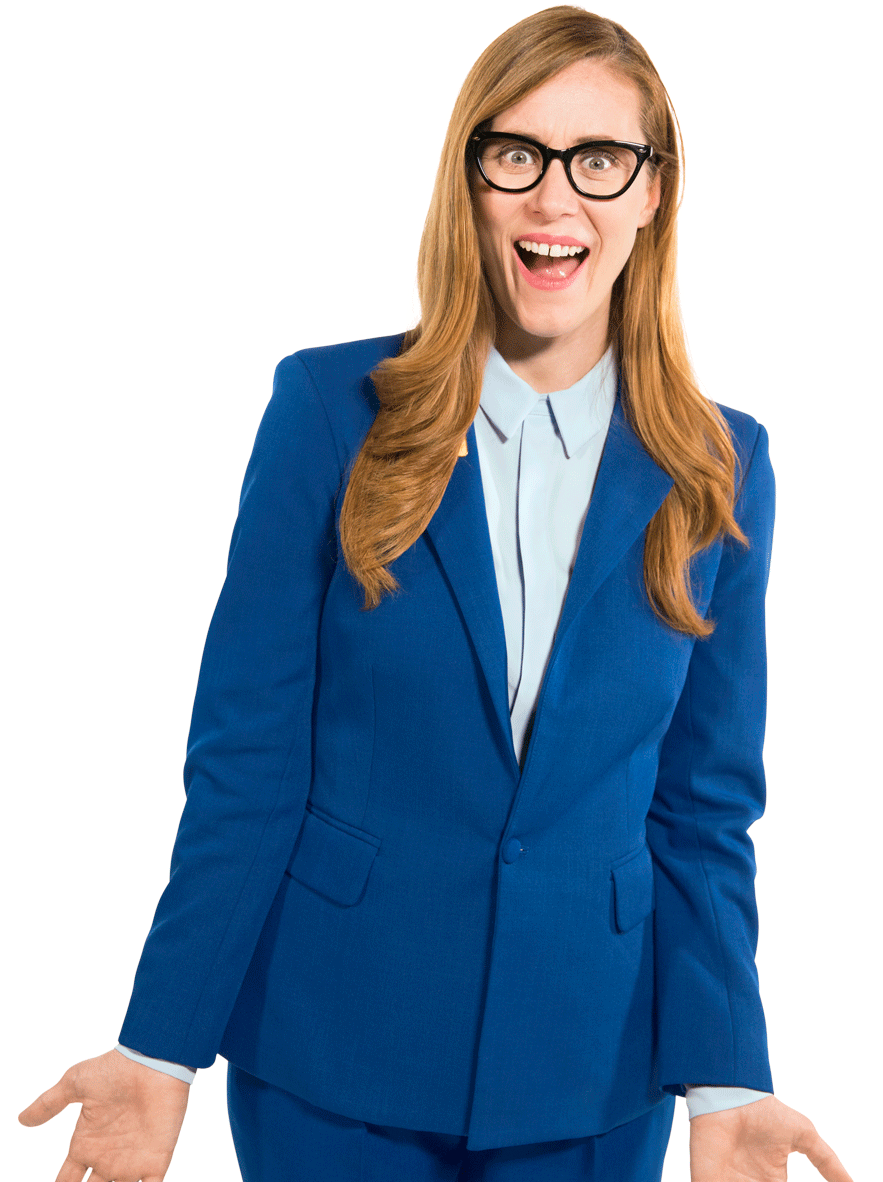

In [648]:
r.text

In [645]:
contain=page_soup.findAll("div",{"class":"o-fixed-width"})
len(contain)

0

<!DOCTYPE html>
<html class="f3 scroll-container">
  <head>
    <style>/* Reset */
html, body, div, span, applet, object, iframe,
h1, h2, h3, h4, h5, h6, p, blockquote, pre,
a, abbr, acronym, address, big, cite, code,
del, dfn, em, img, ins, kbd, q, s, samp,
small, strike, strong, sub, sup, tt, var,
b, u, i, center,
dl, dt, dd, ol, ul, li,
fieldset, form, label, legend,
table, caption, tbody, tfoot, thead, tr, th, td,
article, aside, canvas, details, embed,
figure, figcaption, footer, header, hgroup,
menu, nav, output, ruby, section, summary,
time, mark, audio, video {
  margin: 0;
  padding: 0;
  border: 0;
  font-size: 100%;
  font: inherit;
  vertical-align: baseline;
}

/* HTML5 display-role reset for older browsers */
article, aside, details, figcaption, figure,
footer, header, hgroup, menu, nav, section {
  display: block;
}

ol, ul {
  list-style: none;
}

blockquote, q {
  quotes: none;
}

blockquote:before, blockquote:after,
q:before, q:after {
  content: '';
  content: none;

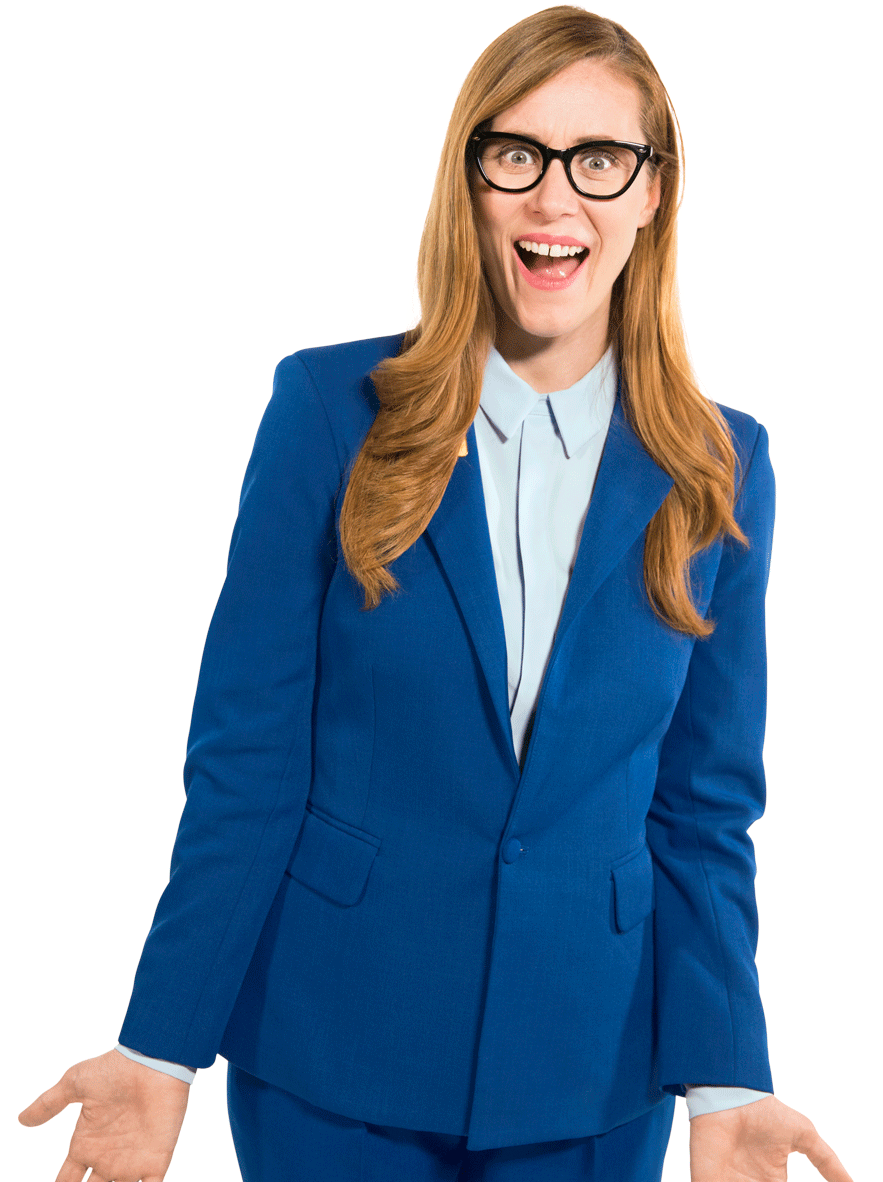

In [647]:
# not working
# -*-coding:utf8-*-

import requests

req = requests.get("https://www.53.com/content/fifth-third/en/customer-service/credit-card-faqs")

if req.encoding == 'ISO-8859-1':
    encodings = requests.utils.get_encodings_from_content(req.text)
    if encodings:
        encoding = encodings[0]
    else:
        encoding = req.apparent_encoding

    # encode_content = req.content.decode(encoding, 'replace').encode('utf-8', 'replace')
    global encode_content
    encode_content = req.content.decode(encoding, 'replace') #如果设置为replace，则会用?取代非法字符；


print(encode_content)

# with open('test.html','w',encoding='utf-8') as f:
#     f.write(encode_content)

In [649]:
page_soup=soup(encode_content,"html.parser")

In [651]:
contain=page_soup.findAll("div",{"class":"c-accordion js-accordion c-accordion--border-bottom c-accordion--border c-accordion--border-top srf-accordion-root section"})
len(contain)

0

# shawbrook

In [652]:
import urllib


my_url='https://www.shawbrook.co.uk/direct/savings/help/faq/'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [653]:
contain=page_soup.findAll("div",{"class":"search-result search-result--generic faq"})
len(contain)

16

In [654]:
contain[1].div.h4.text.strip()

'Sending a deposit from your nominated account'

In [655]:
contain[1].div.div.p.text.strip()

'Many banks have introduced the ‘Confirmation of Payee’ scheme, which is designed to match the account name you have entered with the name on the account where the deposit is intended. Your Shawbrook Savings accounts are not included in this scheme; therefore, your bank will advise you that they have been unable to confirm the payee and to either check or continue.'

In [656]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].div.h4.text.strip()
        df.loc[i,"answers"]=contain[i].div.div.p.text.strip()
df

,questions,answers
0,Why is the interest rate showing as 0% in my a...,The interest rate will show as 0% until you de...
1,Sending a deposit from your nominated account,Many banks have introduced the ‘Confirmation o...
2,What is Strong Customer Authentication (SCA)?,Strong Customer Authentication (also known as ...
3,How will the One Time Passcode (OTP) be sent t...,If you have a mobile number the OTP will be se...
4,What is an ISA allowance?,Your ISA allowance is the total amount of mone...
5,Can I have more than one Cash ISA in a single ...,You cannot fund more than one Cash ISA in the ...
6,What happens if I exceed the maximum annual Ca...,We monitor the total level of deposits made du...
7,How much can I save in an ISA?,The ISA allowance for the 2021/22 tax year is ...
8,What are your opening hours?,"Monday to Friday, 9:00am to 5:30pm, excluding ..."
9,What is Shawbrook Bank's sort code?,Our sort code is 16-58-73.


In [657]:
table=pd.concat([table,df])

In [660]:
len(table)

648

In [ ]:
#

# capitalone 搞不定

https://www.capitalone.com/credit-cards/faq/

In [661]:
import urllib


my_url='https://www.capitalone.com/credit-cards/faq/'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [666]:
page_html # 这里面都是乱码，而且跟之前的数字型的乱码不一样，这是字符乱码

b'<!DOCTYPE html><html lang="en"><head>\n    <meta charset="utf-8">\n    <title>Capital One</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <link rel="icon" type="image/x-icon" href="/assets/shell/favicon.ico">\n\n    <link rel="preconnect" href="https://ecm.capitalone.com">\n    <link rel="dns-prefetch" href="https://ecm.capitalone.com">\n    <link rel="preconnect" href="https://tms.capitalone.com">\n    <link rel="dns-prefetch" href="https://tms.capitalone.com">\n    <link rel="preconnect" href="https://mboxedge34.tt.omtrdc.net">\n    <link rel="dns-prefetch" href="https://mboxedge34.tt.omtrdc.net">\n    <link rel="dns-prefetch" href="https://bam.nr-data.net">\n    <link rel="dns-prefetch" href="https://js-agent.newrelic.com" class="new-relic">\n    <link rel="dns-prefetch" href="https://d.agkn.com">\n    <link rel="dns-prefetch" href="https://smetrics.capitalone.com">\n    <link rel="dns-prefetch" href="https://deviceinfo.capitalone.com">\n  

In [665]:
contain=page_soup.findAll("div",{"class":"card-accordion"})
len(contain)

0

In [654]:
contain[1].div.h4.text.strip()

'Sending a deposit from your nominated account'

In [655]:
contain[1].div.div.p.text.strip()

'Many banks have introduced the ‘Confirmation of Payee’ scheme, which is designed to match the account name you have entered with the name on the account where the deposit is intended. Your Shawbrook Savings accounts are not included in this scheme; therefore, your bank will advise you that they have been unable to confirm the payee and to either check or continue.'

In [656]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].div.h4.text.strip()
        df.loc[i,"answers"]=contain[i].div.div.p.text.strip()
df

,questions,answers
0,Why is the interest rate showing as 0% in my a...,The interest rate will show as 0% until you de...
1,Sending a deposit from your nominated account,Many banks have introduced the ‘Confirmation o...
2,What is Strong Customer Authentication (SCA)?,Strong Customer Authentication (also known as ...
3,How will the One Time Passcode (OTP) be sent t...,If you have a mobile number the OTP will be se...
4,What is an ISA allowance?,Your ISA allowance is the total amount of mone...
5,Can I have more than one Cash ISA in a single ...,You cannot fund more than one Cash ISA in the ...
6,What happens if I exceed the maximum annual Ca...,We monitor the total level of deposits made du...
7,How much can I save in an ISA?,The ISA allowance for the 2021/22 tax year is ...
8,What are your opening hours?,"Monday to Friday, 9:00am to 5:30pm, excluding ..."
9,What is Shawbrook Bank's sort code?,Our sort code is 16-58-73.


In [657]:
table=pd.concat([table,df])

In [660]:
len(table)

648

In [672]:
table.to_csv("table_v1.csv",encoding='utf_8_sig')

# openbank 搞不定
https://www.openbanking.org.uk/faqs/

In [670]:
import urllib
my_url='https://www.shawbrook.co.uk/direct/savings/help/faq/'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0'}

req = urllib.request.Request(url=my_url, headers=headers)

page_html=urllib.request.urlopen(req).read()
page_soup=soup(page_html,"html.parser")


In [668]:
contain=page_soup.findAll("article",{"class":"wp-block-luna-single-accordion single-accordion"})
len(contain)

0

In [671]:
contain=page_soup.findAll("article",{"class":"m12__accordion-wrap"})
len(contain)

0

In [654]:
contain[1].div.h4.text.strip()

'Sending a deposit from your nominated account'

In [655]:
contain[1].div.div.p.text.strip()

'Many banks have introduced the ‘Confirmation of Payee’ scheme, which is designed to match the account name you have entered with the name on the account where the deposit is intended. Your Shawbrook Savings accounts are not included in this scheme; therefore, your bank will advise you that they have been unable to confirm the payee and to either check or continue.'

In [656]:
df=pd.DataFrame(columns=["questions","answers"])

for i in range(0,len(contain)):        
        df.loc[i,"questions"]=contain[i].div.h4.text.strip()
        df.loc[i,"answers"]=contain[i].div.div.p.text.strip()
df

,questions,answers
0,Why is the interest rate showing as 0% in my a...,The interest rate will show as 0% until you de...
1,Sending a deposit from your nominated account,Many banks have introduced the ‘Confirmation o...
2,What is Strong Customer Authentication (SCA)?,Strong Customer Authentication (also known as ...
3,How will the One Time Passcode (OTP) be sent t...,If you have a mobile number the OTP will be se...
4,What is an ISA allowance?,Your ISA allowance is the total amount of mone...
5,Can I have more than one Cash ISA in a single ...,You cannot fund more than one Cash ISA in the ...
6,What happens if I exceed the maximum annual Ca...,We monitor the total level of deposits made du...
7,How much can I save in an ISA?,The ISA allowance for the 2021/22 tax year is ...
8,What are your opening hours?,"Monday to Friday, 9:00am to 5:30pm, excluding ..."
9,What is Shawbrook Bank's sort code?,Our sort code is 16-58-73.


In [657]:
table=pd.concat([table,df])

In [660]:
len(table)

648